In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from transformers import pipeline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Define the ticker symbol
ticker_symbol = 'AAPL'

# Get data on this ticker
ticker_data = yf.Ticker(ticker_symbol)

# Get the historical prices for this ticker
ticker_df = ticker_data.history(period='1mo')  # You can change the period as needed

# Display the first few rows of the dataframe
print(ticker_df.head())


                                 Open        High         Low       Close  \
Date                                                                        
2024-09-26 00:00:00-04:00  227.300003  228.500000  225.410004  227.520004   
2024-09-27 00:00:00-04:00  228.460007  229.520004  227.300003  227.789993   
2024-09-30 00:00:00-04:00  230.039993  233.000000  229.649994  233.000000   
2024-10-01 00:00:00-04:00  229.520004  229.649994  223.740005  226.210007   
2024-10-02 00:00:00-04:00  225.889999  227.369995  223.020004  226.779999   

                             Volume  Dividends  Stock Splits  
Date                                                          
2024-09-26 00:00:00-04:00  36636700        0.0           0.0  
2024-09-27 00:00:00-04:00  34026000        0.0           0.0  
2024-09-30 00:00:00-04:00  54541900        0.0           0.0  
2024-10-01 00:00:00-04:00  63285000        0.0           0.0  
2024-10-02 00:00:00-04:00  32880600        0.0           0.0  


In [2]:
# Load a sample financial news dataset (replace with your actual dataset)
news_data = {
    'headline': [
        "Apple's stock surges after strong earnings report",
        "Apple faces lawsuit over iPhone slowdown",
        "Apple announces new product lineup",
        "Apple's revenue growth slows down",
        "Apple to open new stores worldwide"
    ],
    'sentiment': [1, 0, 1, 0, 1]  # 1 for positive, 0 for negative
}

news_df = pd.DataFrame(news_data)

# Display the first few rows of the news data
print(news_df.head())


                                            headline  sentiment
0  Apple's stock surges after strong earnings report          1
1           Apple faces lawsuit over iPhone slowdown          0
2                 Apple announces new product lineup          1
3                  Apple's revenue growth slows down          0
4                 Apple to open new stores worldwide          1


In [3]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import TextClassificationPipeline

# Load the tokenizer and model explicitly
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

# Initialize the sentiment analysis pipeline with truncation
sentiment_pipeline = TextClassificationPipeline(model=model, tokenizer=tokenizer, truncation=True)


Processed text: Apple's stock surges after strong earnings report... -> Sentiment: POSITIVE
Processed text: Apple faces lawsuit over iPhone slowdown... -> Sentiment: NEGATIVE
Processed text: Apple announces new product lineup... -> Sentiment: POSITIVE
Processed text: Apple's revenue growth slows down... -> Sentiment: NEGATIVE
Processed text: Apple to open new stores worldwide... -> Sentiment: POSITIVE
                                            headline  sentiment  \
0  Apple's stock surges after strong earnings report          1   
1           Apple faces lawsuit over iPhone slowdown          0   
2                 Apple announces new product lineup          1   
3                  Apple's revenue growth slows down          0   
4                 Apple to open new stores worldwide          1   

  predicted_sentiment  
0            POSITIVE  
1            NEGATIVE  
2            POSITIVE  
3            NEGATIVE  
4            POSITIVE  


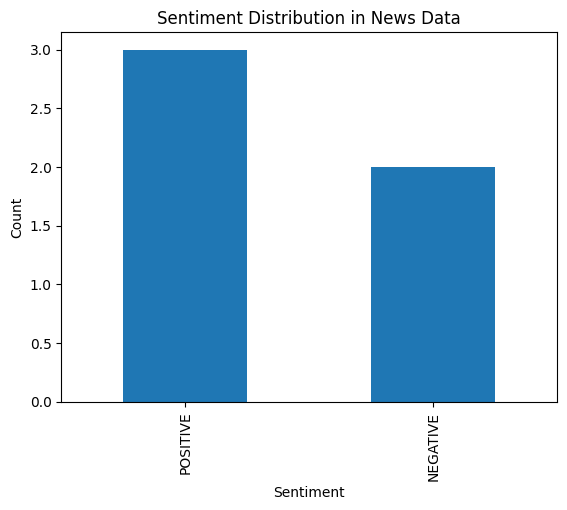

In [4]:
# Apply the sentiment analysis model to the news data
def get_sentiment(text):
    try:
        sentiment = sentiment_pipeline(text)[0]['label']
        print(f"Processed text: {text[:50]}... -> Sentiment: {sentiment}")
        return sentiment
    except Exception as e:
        print(f"Error processing text: {text[:50]}...")
        print(e)
        return None

news_df['predicted_sentiment'] = news_df['headline'].apply(get_sentiment)

# Display the first few rows of the news data with predicted sentiment labels
print(news_df.head())

# Visualize the distribution of sentiments
news_df['predicted_sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Distribution in News Data')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [5]:
# Convert sentiment labels to match the predicted sentiment format
news_df['sentiment'] = news_df['sentiment'].apply(lambda x: 'POSITIVE' if x == 1 else 'NEGATIVE')

# Calculate the accuracy of the model
accuracy = (news_df['predicted_sentiment'] == news_df['sentiment']).mean()
print(f'Model Accuracy: {accuracy:.2f}')


Model Accuracy: 1.00
